# Wave Equation
$
u_{tt} = u_{xx}
$

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from utils_0 import *

In [2]:
nx = 100
nt = 1000
a = 0
b = 1
t0 = 0
c = 1
tf = 3
dx = (b-a)/(nx-1)
dt = (tf-t0)/(nt-1)
x = np.arange(a,b+0.00000001,dx)
t = np.arange(t0,tf+0.00000000000001,dt)
s = ((dt**2)  *  (c**2))/dx**2
s

0.08838568298027757

In [3]:
UA = np.zeros((nx, nt))
for i in range(nx):
    for j in range(nt):
        UA[i,j] = np.sin(np.pi*x[i])*(np.cos(np.pi*t[j]) + np.sin(np.pi*t[j])/np.pi)
        

### Numerical solution

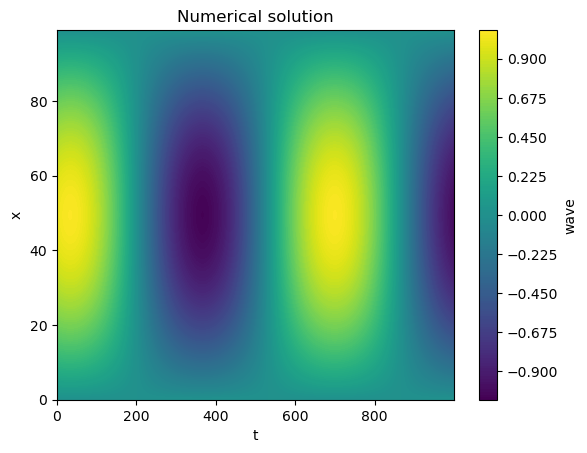

In [4]:
UN = np.zeros((nx, nt))
UN[:,0] = np.sin(np.pi*x)
UN[:,1] = np.sin(np.pi*x)*(1+dt)

for j in range(1, nt-1):
    for i in range(1, nx-1):
        UN[i,j+1] = s*(UN[i-1,j] - 2*UN[i,j] + UN[i+1,j]) + 2*UN[i,j] - UN[i,j-1]
plt.contourf(UN, 200)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Numerical solution')
plt.colorbar(label="wave", orientation="vertical")
plt.show()

In [5]:
Ut, R, rhs_des = build_linear_system_order2(UN, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 8)

## FIND-SINDy

In [6]:
w = TrainSTRidge(R,Ut,10**-4,50)
print("PDE derived using STRidge")
print_pde(w, rhs_des)

PDE derived using STRidge
u_t = (-2.463894 +0.000000i)u
    + (0.249645 +0.000000i)u_{xx}
    + (-0.004774 +0.000000i)u_{xxxx}
    + (0.004656 +0.000000i)u_{xxxxxx}
   


In [7]:
True_theta = np.zeros(49)
True_theta[14] = 1

In [8]:
print('SINDy L2 (0% noise)  :',np.linalg.norm(True_theta - w.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (0% noise)  : 2.5756266490236057


## SINDy

In [9]:
dxdt = np.column_stack(( Ut ))
lam = 0.1 
Xi = sindy(lam,R,dxdt)
print_pde(Xi, rhs_des)
theta = []
for i in Xi:
    if (i.real[0])!=0:
        theta.append(1)
    else:
        theta.append(0)

u_t = (0.999924 +0.000000i)u_{xx}
   


In [10]:
print('SINDy L2 (0% noise)  :',np.linalg.norm(True_theta - Xi.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (0% noise)  : 7.649674004073237e-05


In [11]:
sum_ = 0
for i in range(len(True_theta)):
    sum_ += abs((True_theta)[i] - (Xi)[i])
sum_

array([7.649674e-05])

## Variational Bayes

In [12]:
tol = 0.01
pip = 0.9
verbosity = True
initz0 = initialization(theta)
xdts = Ut.reshape(-1)
DS = Variational_Bayes_code(R, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 282042.63003443944
Iteration = 1  log(Likelihood) = 293098.8806380574
Iteration = 2  log(Likelihood) = 293101.095345703
Iteration = 3  log(Likelihood) = 293101.0949445034
OOPS!  log(like) decreasing!!
Iteration = 4  log(Likelihood) = 293101.0946737075
OOPS!  log(like) decreasing!!
Iteration = 5  log(Likelihood) = 293101.09454286064
OOPS!  log(like) decreasing!!
Iteration = 6  log(Likelihood) = 293101.0949361976
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-2.76548901e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.99923457e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

In [13]:
DS['zmean'][np.where(abs(np.diag(DS['wCOV']))>1e-6)] = 0
DS['wmean'][np.where(abs(np.diag(DS['wCOV']))>1e-6)] = 0
zmean = DS['zmean']
zmean[0] = 0

In [14]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta = DS['wmean']
vb_theta[0] = 0
vb_theta = np.sqrt(vb_theta)
nl = R.shape[1]
zmean[0] = 0
print('VB L2 (0% noise)  :',np.linalg.norm(True_theta - vb_theta.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [0.99996173]
VB L2 (0% noise)  : 3.827246196108636e-05


In [15]:
np.sqrt(DS['Wcov'])

array([9.11013803e-07])

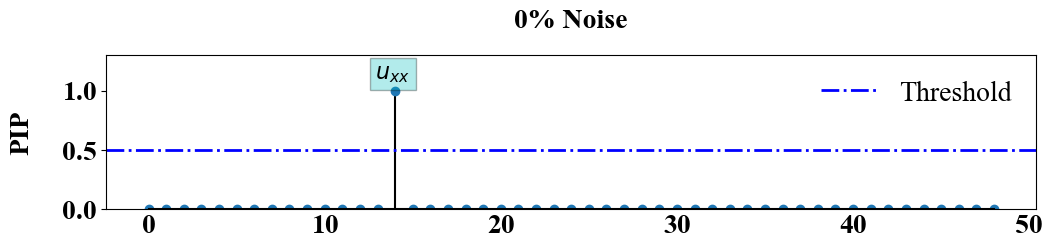

In [16]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (No noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('0% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.85, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


# 1% Noise

In [17]:
np.random.seed(0)
n = UN.shape[0]
m = UN.shape[1]
Un1 = UN + 0.01*np.std(UN)*np.random.randn(n,m)

In [18]:
# Denoise using POD.
FUn1 = np.reshape(Un1, (n,m), order='F')
uun1,usn1,uvn1 = np.linalg.svd(FUn1, full_matrices = False)
dim = 15
UN1 = np.reshape(uun1[:,:dim].dot(np.diag(usn1[:dim]).dot(uvn1[:dim,:])), (n, m), order='F')

In [19]:
Utn1, Rn1, rhs_des1 = build_linear_system_order2(UN1, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 8)

## FIND-SINDy

In [20]:
wn1 = TrainSTRidge(Rn1,Utn1,10**-3,10)
print("PDE derived using STRidge")
print_pde(wn1, rhs_des1)

PDE derived using STRidge
u_t = (-7.691404 +0.000000i)u
    + (0.219379 +0.000000i)u_{xx}
   


In [21]:
print('FIND-SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - wn1.reshape(-1))/ np.linalg.norm(True_theta) )

FIND-SINDy L2 (1% noise)  : 7.730916407620621


## SINDy

In [22]:
dxdt = np.column_stack(( Utn1 ))
lam = 0.2
Xi_n1 = sindy(lam,Rn1,dxdt)
print_pde(Xi_n1, rhs_des)

u_t = (-7.784085 +0.000000i)u
    + (0.211322 +0.000000i)u_{xx}
   


In [23]:
print('SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - Xi_n1.reshape(-1))/ np.linalg.norm(True_theta) )

SINDy L2 (1% noise)  : 7.823937100075771


## Variational Bayes

In [24]:
tol = 0.01
pip = 0.9
verbosity = True
initz0 = initialization(wn1)
xdts = Utn1.reshape(-1)
DS = Variational_Bayes_code(Rn1, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -153590.4378093024
Iteration = 1  log(Likelihood) = -153382.3148041332
Iteration = 2  log(Likelihood) = -153382.31479490694
zmean [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-4.85039398e-03 -7.78146974e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.11508747e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+0

In [25]:
DS['zmean'][np.where(abs(np.diag(DS['wCOV']))>1e-3)] = 0
DS['wmean'][np.where(abs(np.diag(DS['wCOV']))>1e-3)] = 0
zmean = DS['zmean']
zmean[0] = 0

In [26]:
DS = Variational_Bayes_code(Rn1, xdts, zmean, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -154467.81307158648
Iteration = 1  log(Likelihood) = -154258.82181176307
Iteration = 2  log(Likelihood) = -154258.8218025369
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.01611314  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.98429652  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [0.98429652]
Wcov [6.31208224e-06]


In [27]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n1 = DS['wmean']
vb_theta_n1[0] = 0
vb_theta_n1 = np.sqrt(vb_theta_n1)
zmean1 = DS['zmean']
zmean1[0] = 0
print('VB L2 (1% noise)  :',np.linalg.norm(True_theta - vb_theta_n1.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [0.99211719]
VB L2 (1% noise)  : 0.007882808328197766


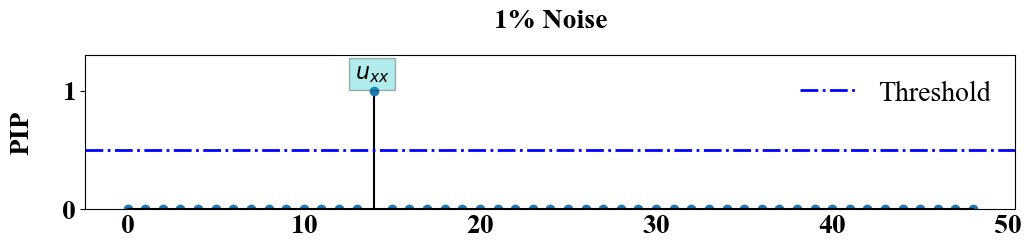

In [28]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (1% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('1% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.85, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


# 2% Noise

In [29]:
np.random.seed(0)
Un2 = UN + 0.02*np.std(UN)*np.random.randn(n,m)

In [30]:
# Denoise using POD.
FUn2 = np.reshape(Un2, (n,m), order='F')
uun2,usn2,uvn2 = np.linalg.svd(FUn2, full_matrices = False)
dim = 15
UN2 = np.reshape(uun2[:,:dim].dot(np.diag(usn2[:dim]).dot(uvn2[:dim,:])), (n, m), order='F')

In [31]:
Utn2, Rn2, rhs_des2 = build_linear_system_order2(UN2, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 8)

## FIND-SINDy

In [32]:
wn2 = TrainSTRidge(Rn2,Utn2,10**-3,5)
print("PDE derived using STRidge")
print_pde(wn2, rhs_des2)

PDE derived using STRidge
u_t = (-7.688366 +0.000000i)u
    + (0.219401 +0.000000i)u_{xx}
   


In [33]:
print('FIND-SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - wn2.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (2% noise)  : 7.727891780114973


## SINDy

In [34]:
dxdt = np.column_stack(( Utn2 ))
lam = 0.2 
Xi_n2 = sindy(lam,Rn2,dxdt)
print_pde(Xi_n2, rhs_des)

u_t = (-7.334714 +0.000000i)u
    + (0.283531 +0.000000i)u^2
    + (-2.917679 +0.000000i)u^3
    + (-1.119450 +0.000000i)u^4
    + (2.925081 +0.000000i)u^5
    + (0.863301 +0.000000i)u^6
    + (0.221515 +0.000000i)u_{xx}
    + (-0.340026 +0.000000i)u^4u_{xx}
    + (0.384983 +0.000000i)u^6u_{xx}
   


In [35]:
print('SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - Xi_n2.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (2% noise)  : 8.591606069250686


## Variational Bayes

In [36]:
tol = .01
pip = 0.9
verbosity = True
initz0 = initialization(wn2)
xdts = Utn2.reshape(-1)
DS = Variational_Bayes_code(Rn2, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -192718.35590260595
Iteration = 1  log(Likelihood) = -192476.27027622063
Iteration = 2  log(Likelihood) = -192476.27026699338
zmean [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.00911681 -7.79246125  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.21138968  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [ 0 13]
Wsel [-7.79246125  0.21138968]
Wcov [0.03156488 0.00029964]


In [37]:
DS['zmean'][np.where(abs(np.diag(DS['wCOV']))>1e-3)] = 0
DS['wmean'][np.where(abs(np.diag(DS['wCOV']))>1e-3)] = 0
zmean = DS['zmean']
zmean[0] = 0

In [38]:
DS = Variational_Bayes_code(Rn2, xdts, zmean, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -193541.39444621318
Iteration = 1  log(Likelihood) = -193298.48710655805
Iteration = 2  log(Likelihood) = -193298.48709733074
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.04841724  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.94092058  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [0.94092058]
Wcov [2.37625379e-05]


In [39]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n2 = DS['wmean']
vb_theta_n2[0] = 0
vb_theta_n2 = np.sqrt(vb_theta_n2)
zmean2 = DS['zmean']
zmean2[0] = 0
print('VB L2 (2% noise)  :',np.linalg.norm(True_theta - vb_theta_n2.reshape(-1))/ np.linalg.norm(True_theta) )

alpha : [0.97001061]
VB L2 (2% noise)  : 0.02998939426609415


In [40]:
np.sqrt(DS['Wcov'])

array([0.00487468])

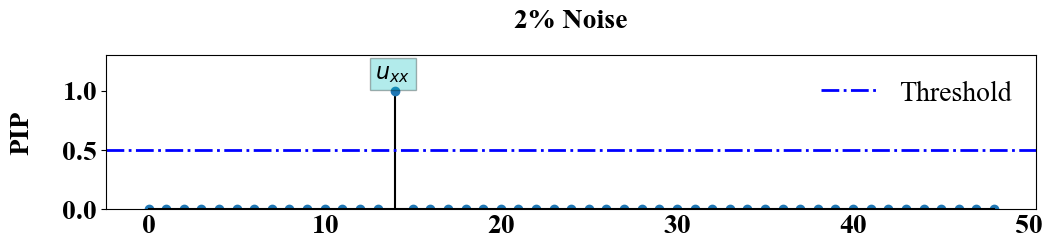

In [41]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean2, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (2% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('2% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.85, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


# 5% Noise

In [42]:
np.random.seed(0)
Un5 = UN + 0.05*np.std(UN)*np.random.randn(n,m)

In [43]:
# Denoise using POD.
FUn5 = np.reshape(Un5, (n,m), order='F')
uun5,usn5,uvn5 = np.linalg.svd(FUn5, full_matrices = False)
dim = 15
UN5 = np.reshape(uun5[:,:dim].dot(np.diag(usn5[:dim]).dot(uvn5[:dim,:])), (n, m), order='F')

In [44]:
Utn5, Rn5, rhs_des5 = build_linear_system_order2(UN5, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 8)

## FIND-SINDy

In [45]:
wn5 = TrainSTRidge(Rn5,Utn5,10**-3,15)
print("PDE derived using STRidge")
print_pde(wn5, rhs_des5)

PDE derived using STRidge
u_t = (-7.775945 +0.000000i)u
    + (0.241281 +0.000000i)u_{xx}
    + (-0.513150 +0.000000i)u^4u_{xx}
    + (0.544130 +0.000000i)u^6u_{xx}
   


In [46]:
print('FIND-SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - wn5.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (5% noise)  : 7.84859030473088


## SINDy

In [47]:
dxdt = np.column_stack(( Utn5 ))
lam = 0.2
Xi_n5 = sindy(lam,Rn5,dxdt)
print_pde(Xi_n5, rhs_des)

u_t = (-7.854577 +0.000000i)u
    + (0.757223 +0.000000i)u^2
    + (-2.815523 +0.000000i)u^4
    + (2.120142 +0.000000i)u^6
    + (1.712506 +0.000000i)u^2u_{xx}
    + (-3.669157 +0.000000i)u^4u_{xx}
    + (2.217711 +0.000000i)u^6u_{xx}
   


In [48]:
print('SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - Xi_n5.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (5% noise)  : 9.849039417301563


## Variational Bayes

In [49]:
tol = .01
pip = 0.9
verbosity = True
initz0 = initialization(wn5)
xdts = Utn2.reshape(-1)
DS = Variational_Bayes_code(Rn5, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -192846.9539758326
Iteration = 1  log(Likelihood) = -192604.97540066397
Iteration = 2  log(Likelihood) = -192604.97539143672
zmean [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-6.39378303e-03 -9.12476966e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.84872556e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.85496900e-01  0.00000000e+00
  1.97209367e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

In [50]:
DS['zmean'][np.where(abs(np.diag(DS['wCOV']))>1e-4)] = 0
DS['wmean'][np.where(abs(np.diag(DS['wCOV']))>1e-4)] = 0
zmean = DS['zmean']
zmean[0] = 0

In [51]:
DS = Variational_Bayes_code(Rn5, xdts, zmean, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -197821.5937520565
Iteration = 1  log(Likelihood) = -197574.97123753803
Iteration = 2  log(Likelihood) = -197574.9712283107
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.20196879  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.68856974  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [0.68856974]
Wcov [1.9690185e-05]


In [52]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n5 = DS['wmean']
vb_theta_n5[0] = 0
vb_theta_n5 = np.sqrt(vb_theta_n5)
zmean5 = DS['zmean']
zmean5[0] = 0
print('VB L2 (5% noise)  :',np.linalg.norm(True_theta - vb_theta_n5.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [0.82980103]
VB L2 (5% noise)  : 0.17019897414220675


In [53]:
np.sqrt(DS['Wcov'])

array([0.00443736])

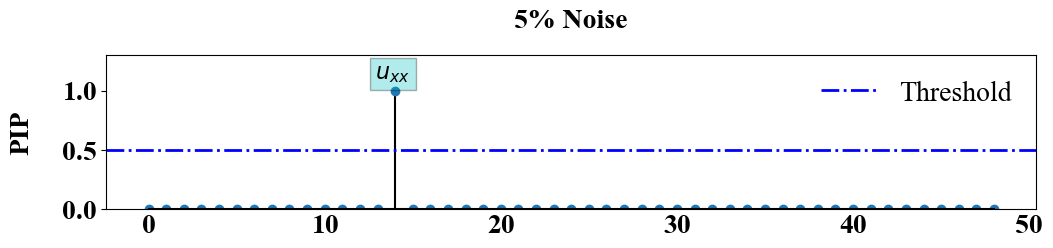

In [54]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean5, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (5% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('5% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.85, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


# 10% Noise

In [55]:
np.random.seed(0)
Un10 = UN + 0.10*np.std(UN)*np.random.randn(n,m)

In [56]:
# Denoise using POD.
FUn10 = np.reshape(Un10, (n,m), order='F')
uun10, usn10, uvn10 = np.linalg.svd(FUn10, full_matrices = False)
dim = 15
UN10 = np.reshape(uun10[:,:dim].dot(np.diag(usn10[:dim]).dot(uvn10[:dim,:])), (n, m), order='F')

In [57]:
Utn10, Rn10, rhs_des10 = build_linear_system_order2(UN10, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 8)

## FIND-SINDy

In [58]:
wn10 = TrainSTRidge(Rn10,Utn10,10**-3,15)
print("PDE derived using STRidge")
print_pde(wn10, rhs_des10)

PDE derived using STRidge
u_t = (-5.934011 +0.000000i)u
    + (0.469652 +0.000000i)u_{xx}
    + (-1.051946 +0.000000i)u^4u_{xx}
    + (1.131663 +0.000000i)u^6u_{xx}
    + (-0.000000 +0.000000i)u_{xxxxxx}
   


In [59]:
print('FIND-SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - wn10.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (10% noise)  : 6.154754758589891


## SINDy

In [60]:
dxdt = np.column_stack(( Utn10 ))
lam = 0.2
Xi_n10 = sindy(lam,Rn10,dxdt)
print_pde(Xi_n10, rhs_des)

u_t = (-23.597114 +0.000000i)u^3
    + (14.777610 +0.000000i)u^5
    + (-0.414154 +0.000000i)uu_{x}
    + (0.614606 +0.000000i)u^2u_{x}
    + (1.760613 +0.000000i)u^3u_{x}
    + (-2.053150 +0.000000i)u^4u_{x}
    + (-1.417162 +0.000000i)u^5u_{x}
    + (1.467372 +0.000000i)u^6u_{x}
    + (2.748874 +0.000000i)u^2u_{xx}
    + (-6.885459 +0.000000i)u^4u_{xx}
    + (4.405269 +0.000000i)u^6u_{xx}
   


In [61]:
print('SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - Xi_n10.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (10% noise)  : 29.37004882801868


## Variational Bayes

In [62]:
tol = .001
pip = 0.9
verbosity = True
initz0 = initialization(wn10)
xdts = Utn10.reshape(-1)
DS = Variational_Bayes_code(Rn10, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov']) 

Iteration = 0  log(Likelihood) = -283804.8648523453
Iteration = 1  log(Likelihood) = -283362.31267518346
Iteration = 2  log(Likelihood) = -283164.3706881877
Iteration = 3  log(Likelihood) = -283194.9983141285
OOPS!  log(like) decreasing!!
Iteration = 4  log(Likelihood) = -283194.99828250275
zmean [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [ -0.01597241 -10.31973525   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.        ]
modelId [0]
Wsel [-

In [63]:
print('alpha :',DS['Wsel'])
vb_theta_n10 = DS['wmean']
vb_theta_n10[0] = 0
zmean10 = DS['zmean']
zmean10[0] = 0
print('VB L2 (10% noise)  :',np.linalg.norm(True_theta - vb_theta_n10.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [-10.31973525]
VB L2 (10% noise)  : 10.368072897322502


In [64]:
np.sqrt(DS['Wcov'])

array([0.24621799])

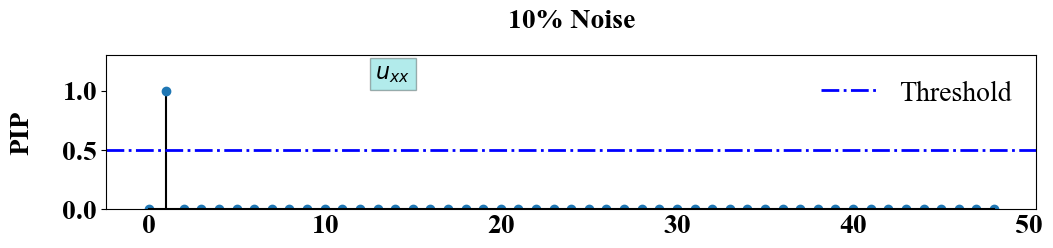

In [65]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean10, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (5% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('10% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.85, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


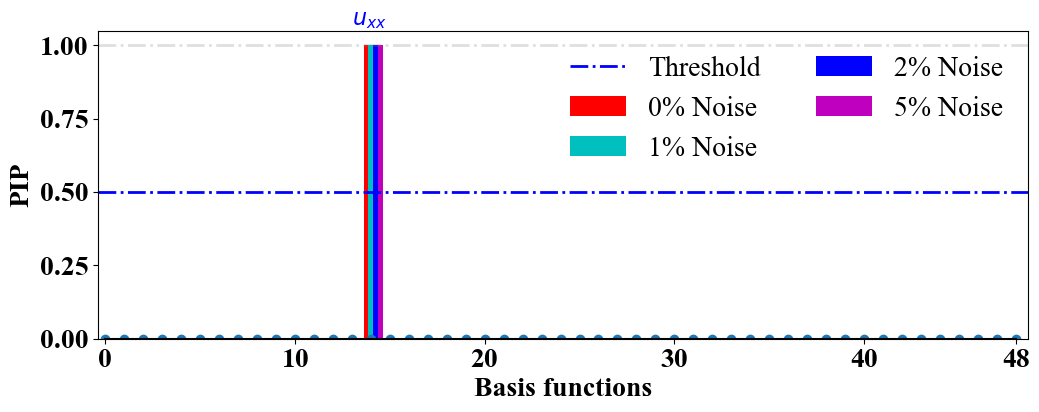

In [66]:
fig = plt.figure(figsize=(12,4))
plt.stem(xr, zmean5*0, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.bar(xr - 0.25, zmean, color = 'r', width = 0.25, label='0% Noise')
plt.bar(xr + 0.0, zmean1, color = 'c', width = 0.25, label='1% Noise')
plt.bar(xr + 0.25, zmean2, color = 'b', width = 0.25, label='2% Noise')
plt.bar(xr + 0.50, zmean5, color = 'm', width = 0.25, label='5% Noise')
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')
plt.axhline(y=1.0, color='grey', linestyle='-.', alpha=0.25, linewidth=2)

plt.xlabel('Basis functions', fontweight='bold')
plt.ylabel('PIP', fontweight='bold')
plt.grid(False)
plt.ylim(0, 1.05)

plt.xticks([0, 10, 20, 30, 40, 48], fontweight='bold')
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both')
plt.margins(0)

plt.text(14.85, 1.07, '$u_{xx}$', color='blue', fontsize=16, ha='right')

plt.legend(loc='upper right', ncol=2, frameon=False, fontsize=20)

plt.show()
fig.savefig('images/1D_WAVE_combined.pdf',format='pdf',dpi=600,bbox_inches='tight')

# Prediction

In [67]:
def Prediction(c):
    nx = 100
    nt = 1000
    a = 0
    b = 1
    t0 = 0
    tf = 3
    dx = (b-a)/(nx-1)
    dt = (tf-t0)/(nt-1)
    x = np.arange(a,b+0.00000001,dx)
    t = np.arange(t0,tf+0.00000000000001,dt)
    s = ((dt**2)  *  (c**2))/dx**2

    UN = np.zeros((nx, nt))
    UN[:,0] = np.sin(np.pi*x)
    UN[:,1] = np.sin(np.pi*x)*(1+dt)

    for j in range(1, nt-1):
        for i in range(1, nx-1):
            UN[i,j+1] = s*(UN[i-1,j] - 2*UN[i,j] + UN[i+1,j]) + 2*UN[i,j] - UN[i,j-1]
            
    return UN

UN_pred = Prediction(0.99996173)
mean = 0.99996173
std = 9.11013756e-07
MCMC = 100
pred_arr = []

for i in range (MCMC):
    theta = np.random.normal(loc = mean, scale = std)
    pred_arr.append(Prediction(theta))
    
pred_arr = np.array(pred_arr)
mu_pred = np.mean(pred_arr, axis=0)
std_pred = np.std(pred_arr, axis=0)
up = mu_pred + 2*std_pred
down = mu_pred - 2*std_pred
UN = Prediction(1)
X, Y = np.meshgrid(t, x)

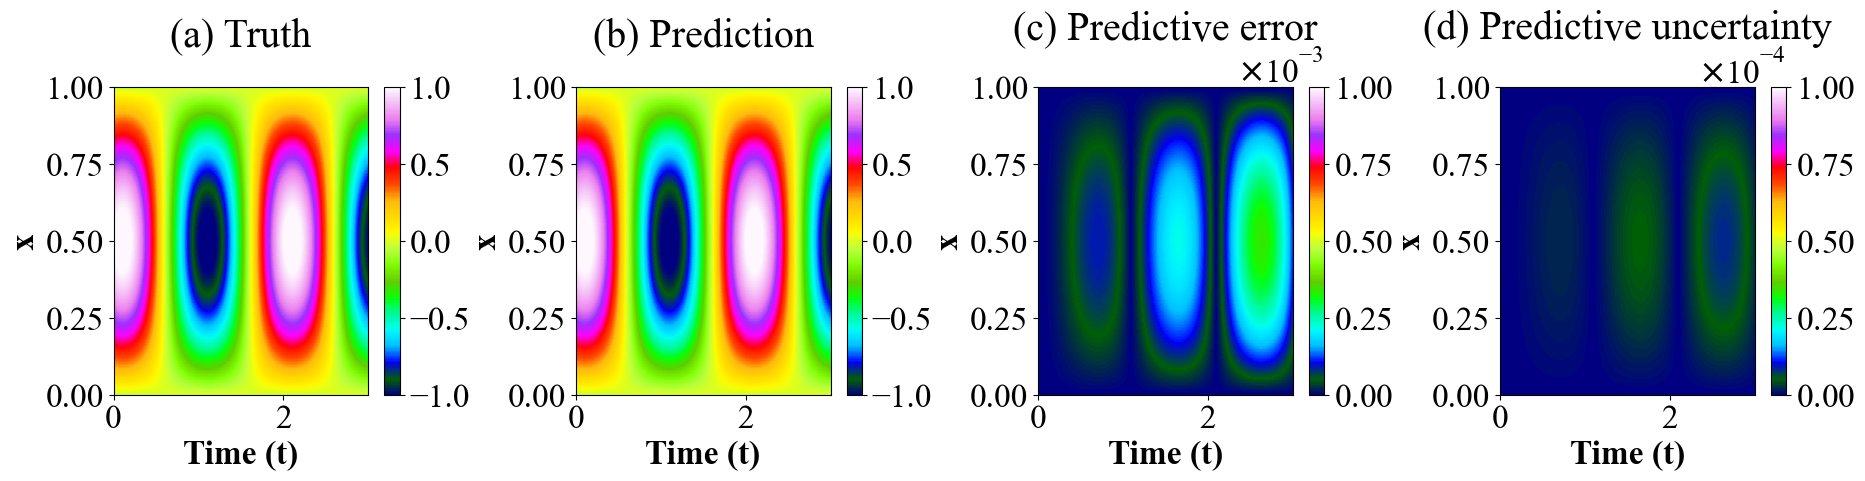

In [68]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(22,4))
fig1.subplots_adjust(wspace=0.45)

plt.subplot(1,4,1)
contour = plt.imshow(UN, cmap='gist_ncar', extent=[0,3,0,1], aspect='auto', origin='lower',
                    vmin=-1, vmax=1)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(a) Truth', pad=30)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((-4, 4))
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,2)
contour = plt.imshow(UN_pred, cmap='gist_ncar', extent=[0,3,0,1], aspect='auto', origin='lower',
                    vmin=-1, vmax=1)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(b) Prediction', pad=30)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((-4, 4))
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,3)
contour = plt.imshow(np.abs(UN_pred-UN), extent=[0,3,0,1], cmap='gist_ncar', aspect='auto', origin='lower',
                     vmin=0, vmax=0.001)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(c) Predictive error', pad=35)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_useMathText(True)
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,4)
contour = plt.imshow(std_pred, cmap='gist_ncar', extent=[0,3,0,1], aspect='auto', origin='lower',
                    vmin=0, vmax=0.0001)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(d) Predictive uncertainty', pad=35)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_useMathText(True)
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')
plt.show()

fig1.savefig('images/Prediction_1D_wave.pdf', format='pdf', dpi=600, bbox_inches='tight')